In [42]:
import torch
from torch import Tensor
import dlc_practical_prologue as prologue
import matplotlib.pyplot as plt

# 1 Nearest neighbor <br>
Write a function that gets a training set and a test sample and returns the label of the training point the closest to the latter.<br>
More precisely, write:<br>
def nearest_classification(train_input, train_target, x):<br>
where<br>
• train_input is a 2d float tensor of dimension n × d containing the training vectors, <br>
• train_target is a 1d long tensor of dimension n containing the training labels,<br>
• x is 1d float tensor of dimension d containing the test vector,<br>
and the returned value is the class of the train sample closest to x for the L2 norm.<br>
Hint: The function should have no python loop, and may use in particular torch.mean , torch.view ,<br>
torch.pow , torch.sum , and torch.sort or torch.min . My version is 164 characters long.<br>


<img src = "img/L2.png", width= 600, height = 300>

In [32]:
train_input, train_target, test_input, test_target = prologue.load_data()

* Using MNIST
** Reduce the data-set (use --full for the full thing)
** Use 1000 train and 1000 test samples


In [33]:
train_input.shape

torch.Size([1000, 784])

In [34]:
train_target.shape

torch.Size([1000])

From the training examples, compare each samples L2-norm to the test data, find min difference.

In [35]:
test_input.shape

torch.Size([1000, 784])

In [36]:
# 7 
test_tensor = test_input[0]
test_label = test_target[0]

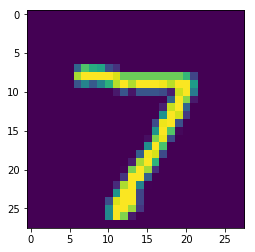

In [48]:
# validate that it is number 7
plt.imshow(test_tensor.numpy().reshape(28,28))

In [38]:
# 5
train_tensor = train_input[0]
train_label = train_target[0]

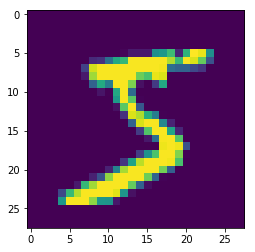

In [47]:
# validate that it is number 5 
plt.imshow(train_tensor.numpy().reshape(28,28))

---

In [ ]:
# find the index location for number equals to 7
print ((train_target == 7).nonzero())

In [72]:
# L2-norm of 7 and 5
torch.mean(torch.pow((test_tensor - train_tensor),2))

tensor(7321.2207)

In [71]:
# L2-norm of 7 and 7
torch.mean(torch.pow((test_tensor - train_input[15]),2))

tensor(5114.3701)

In [73]:
# L2-norm of 7 and 1
torch.mean(torch.pow((test_tensor - train_input[14]),2))

tensor(6113.7500)

In [74]:
torch.mean(torch.pow((test_tensor - train_input), 2))

tensor(7855.7261)

In [80]:
torch.pow((test_tensor - train_input), 2).shape

torch.Size([1000, 784])

In [82]:
tensor_dif = torch.pow((test_tensor - train_input), 2)

In [88]:
# find the mean value using dim = 1 
torch.mean(tensor_dif, 1)

tensor([  7321.2207,   8961.5322,   7391.7515,   8337.0576,   7015.3140,
          7771.8867,   7209.6172,   8920.5703,   5994.8979,   6549.0410,
          7741.6606,   7322.4004,  11048.4473,   9087.2822,   6113.7500,
          5114.3701,   6614.7974,   7873.9644,   6822.4683,   5632.9590,
         10952.7285,  10022.4785,   6001.4731,   8125.7769,   7636.8291,
         11408.8760,   5093.8203,  10203.3389,   7684.5205,   6386.1133,
          7181.1328,   9874.1133,   7095.3403,   5533.8799,   8011.8457,
          6853.4922,  10107.4609,   8980.8906,   5616.8765,   7305.5508,
          5825.6519,   7895.8994,   4426.8813,   5742.9897,   6145.6328,
          4511.5562,   7146.6123,   7796.1621,   6488.5483,   8922.8906,
          7466.9526,  11898.7891,   3969.4695,   7238.6860,   4296.1299,
          7619.7183,  11669.1426,   4692.1211,   9903.1621,   8285.6094,
          9772.4258,   7888.8799,  10051.5361,  12483.2256,   8810.2295,
          8225.2568,   9451.9502,   6797.7119,   95

In [93]:
# find the minimum tensor value and index location: value, index
torch.min(torch.mean(torch.pow((test_tensor - train_input), 2), 1), 0)

(tensor(1761.1046), tensor(773))

In [157]:
def nearest_classification(train_input, train_target, x):
    # find the minimum tensor value and index location: value, index
    value, index = torch.min(torch.mean(torch.pow((x - train_input), 2), 1), 0)
    #print(train_target[index].data.tolist())
    
    return train_target[index].data.tolist() # we need to convert the tensor to a list 

In [126]:
val= nearest_classification(train_input, train_target, test_tensor)

7


---

# 2 Error estimation <br>

Write a function <br>

def compute_nb_errors(train_input, train_target, test_input, test_target,
                      mean = None, proj = None): <br>
where<br>
• train_input is a 2d float tensor of dimension n × d containing the train vectors, <br> 
• train_target is a 1d long tensor of dimension n containing the train labels,<br>
• test_input is a 2d float tensor of dimension m × d containing the test vectors, <br>
• test_target is a 1d long tensor of dimension m containing the test labels,<br>
• mean is either None or a 1d float tensor of dimension d,<br>
• proj is either None or a 2d float tensor of dimension c × d ,<br>

that subtracts mean (if it is not *None*) from the vectors of both train_input and test_input, apply the operator proj (if it is not*None*) to both, and returns the number of classification errors using the 1-nearest-neighbor rule on the resulting data.<br>
Hint: Use in particular torch.mm . My version is 487 characters long, and it has a loop (the horror!)


In [160]:
def compute_nb_errors(train_input, train_target, test_input, test_target, mean = None, 
                      proj = None):
    
    if mean != None:
        train_input = (train_input - mean)
        test_input = (test_input - mean)
    if proj != None:
        train_input = train_input.mm(torch.transpose(proj, 0, 1))
        test_input = test_input.mm(torch.transpose(proj, 0, 1))
    
    nb_errors = 0
    
    for i in range(test_input.shape[0]):
        if test_target[i].tolist() != nearest_classification(train_input, 
                                                             train_target, test_input[i]):
            nb_errors += 1
    
    print(nb_errors)
    
    return nb_errors

In [161]:
errors = compute_nb_errors(train_input, train_target, test_input, test_target)

172


---

# 3 PCA <br>
Write a function <br>

def PCA(x): <br>

where x is a 2d float tensor of dimension n × d , which returns a pair composed of the 1d <br>mean vector of dimension d and the PCA basis, ranked in decreasing order of the eigen-<br>values, as a 2d tensor of dimension d × d. <br>

Hint: The function should have no python loop, and use in particular torch.eig , and torch.sort . My version is 275 characters long.

In [163]:
torch.eig(test_tensor.view(28,28))

(tensor([[   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [ 513.1667,    0.0000],
         [ 554.7198,    0.0000],
         [-324.6695,    0.0000],
         [ 197.7800,    0.0000],
         [-128.6437,    0.0000],
         [ 106.2060,    0.0000],
         [  19.9167,   17.6108],
         [  19.9167,  -17.6108],
         [ -58.4233,    0.0000],
         [  34.4516,    0.0000],
         [  -0.4726,    0.0000],
         [   0.0241,    0.5667],
         [   0.0241,   -0.5667],
         [   0.7201,    0.0000],
         [   5.2827,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000],
         [   0.0000,    0.0000]]), tensor([]))